# Italy vs Port GHG

In [12]:
#Import Librarys 

import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [13]:
ghg_emissions = pd.read_excel('/Users/Shiva/Documents/DATA_ANALYTICS/Week6/Project/DataSets/caitcountryghgemissions-alldata.xlsx', header=[0,1] , sheet_name='GHG Emissions')

In [14]:
#Cleaning

ghg_emissions_filt = ghg_emissions.loc[ghg_emissions[('Unnamed: 0_level_0','Country')].isin(['Portugal','Italy'])].reset_index()

ghg_emissions_filt.columns = ghg_emissions_filt.columns.droplevel()

ghg_emissions_filt.drop(columns = '', inplace = True)

In [15]:
ghg_year = ghg_emissions_filt[['Country','Year','Total GHG Emissions Including Land-Use Change and Forestry (MtCO₂e‍)']]


In [16]:
### PLot This vs YEAR 

ds_pivot = ghg_year.pivot(index='Year', columns='Country', values='Total GHG Emissions Including Land-Use Change and Forestry (MtCO₂e‍)')

ds_pivot.columns = [x for x in ds_pivot.columns.values]
ds_pivot

,Italy,Portugal
Year,,
1990,482.9378,59.5063
1991,466.9702,60.1275
1992,465.9221,64.1066
1993,456.9903,62.9316
1994,452.4753,64.8830
1995,474.4137,68.5708
1996,473.1699,67.1225
1997,477.5349,69.5131
1998,489.8145,74.3907


In [17]:
ds_pivot.describe()

,Italy,Portugal
count,23.000000,23.000000
mean,485.016639,72.518209
std,29.653227,7.818554
min,431.765300,59.506300
25%,461.456200,67.111300
50%,482.937800,72.662500
75%,504.347850,79.889400
max,532.293700,84.654200


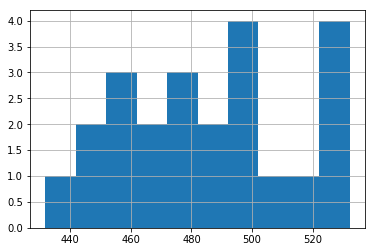

In [18]:
ds_pivot['Italy'].hist()

# Statistical analysis 

In [19]:
### T independent test

## H0 : There is no difference between GHG emissions on ITALY AND PORTUGAL 

#significance level = 0.05


stats.ttest_ind(ds_pivot['Italy'], ds_pivot['Portugal'])

Ttest_indResult(statistic=64.50892891778126, pvalue=3.251802946870698e-45)

In [20]:
"""
There is a difference between the two 

"""

'\nThere is a difference between the two \n\n'

In [21]:
### ANOVA analyse on variance 

#H0 : There is no difference between GHG emissions on ITALY AND PORTUGAL 

#significance level = 0.05

stats.f_oneway(ds_pivot['Italy'], ds_pivot['Portugal'])

F_onewayResult(statistic=4161.401910119429, pvalue=3.251802946869453e-45)

In [22]:
"""
There is a difference between the two. Reject null hypotesis. 

"""

'\nThere is a difference between the two. Reject null hypotesis. \n\n'

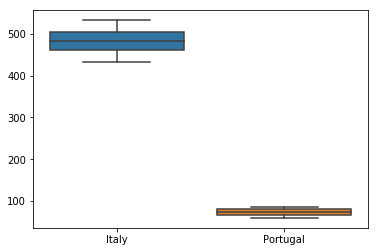

In [23]:
sns.boxplot(data = ds_pivot)

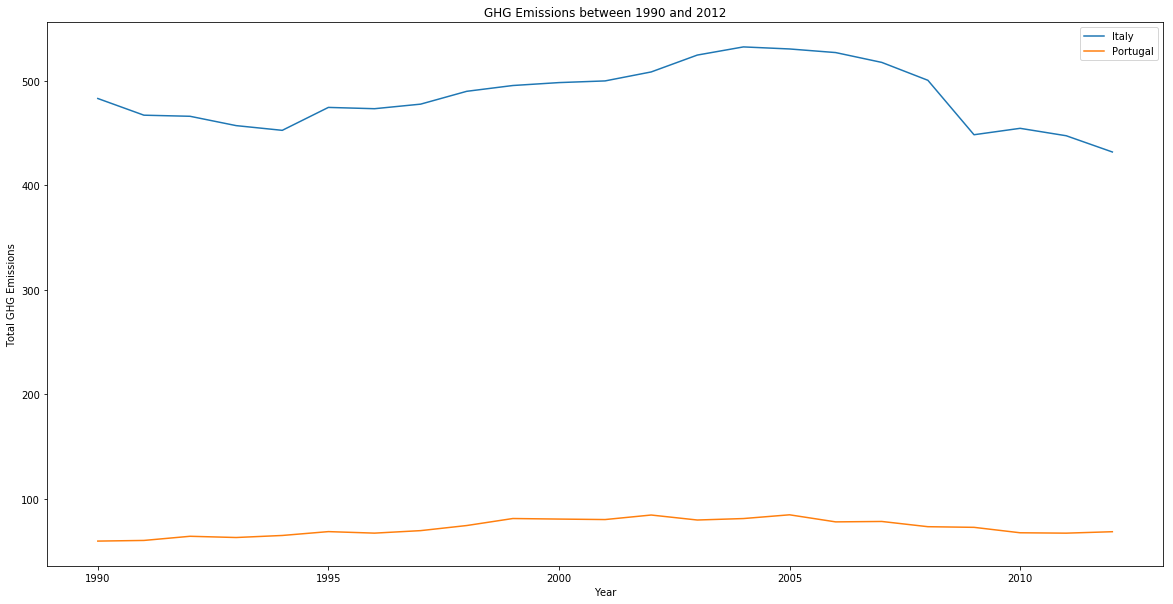

In [28]:
# your code here
fig, axs = plt.subplots(1, 1, figsize=(20, 10))

plt.plot(ds_pivot['Italy'], label='Italy')
plt.plot(ds_pivot['Portugal'], label='Portugal')   ## TODO: show the multiple plots on the same plot!

#plt.xscale('linear')  # to linear scale uncomment this one! and the on bellow and coment the two lines up
#plt.yscale('linear')


plt.xlabel('Year')
plt.ylabel('Total GHG Emissions')

plt.title("GHG Emissions between 1990 and 2012")
plt.legend()
plt.savefig('GHG_Emissions_pt_It.png')



In [25]:
ds_pivot.corr()

,Italy,Portugal
Italy,1.000000,0.760541
Portugal,0.760541,1.000000
